## TO DO
- Try out that script is working with new dataset (including the clustering part) with the old functions and properties.
- Solve saving in excel file problems: 
    - add NaN to bbox_nucleus and bbox_mitochondria
    - add indexes
- Probable that there are some small particles classified as cell, nucleus and mitochondria -> determine the minimum size to consider them and filter out the rest.
- Calculate number of each organelle per slide
- Combine cells in 3D:
    - install and try https://pypi.org/project/connected-components-3d/
- Calculate volume of each cell: each slide = 200nm
- Eliminate repeated or blurry sections from the analysis (check in VAST) but after calculating the volume.

In [1]:
from Cells import Cells
from MGFeatures import *
import numpy as np
import pandas as pd
from joblib import Parallel, delayed
import napari
from tifffile import imsave
import skimage.measure
import time

C:\Users\Gast-User\.conda\envs\MG\lib\site-packages\numba\core\decorators.py:253: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [2]:
def get_area(labels, labels_list): 
    areas = []
    for i in labels_list:
        area = np.count_nonzero(labels == i)
        areas.append(area)
    areas = np.array(areas)
    return areas

In [3]:
folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\cell_final'

In [4]:
cell = Cells(0)
imageshape = cell.get_imageshape(folder) #TODO: this step is redundant! Fix in cells
cell_image = cell.img_from_tiles(folder)
cell_labels = cell.label_cells(cell_image)


StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
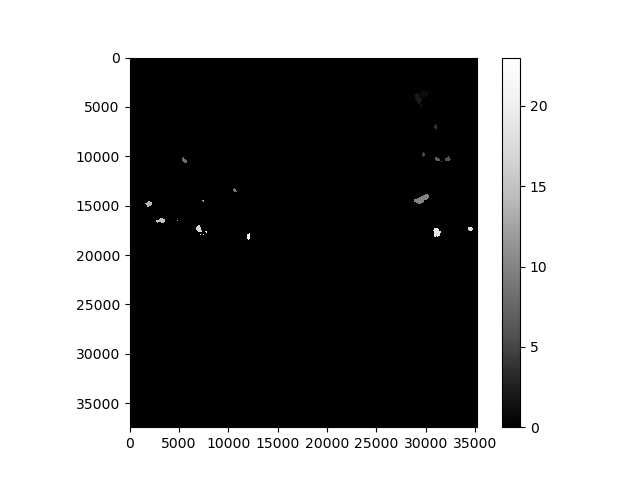
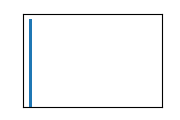

In [5]:
cell_labels

In [24]:
imsave('cell_labels_3.tif', cell_labels)

C:\Users\Gast-User\AppData\Local\Temp\ipykernel_12116\178872849.py:1: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  imsave('cell_labels_3.tif', cell_labels)


In [5]:
bbox_rects = []
for region in regionprops(cell_labels):
    bbox_rect = []
    bbox = region.bbox
    bbox_rect = draw_bbox(bbox)
    bbox_rects.append(bbox_rect)


In [9]:
len(bbox_rects)

23

In [7]:
folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\cell_final'
mitochondria_folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\mitochondria_final'
cell = Cells(0)

imageshape = cell.get_imageshape(folder) #TODO: this step is redundant! Fix in cells
cell_image = cell.img_from_tiles(folder)
cell_labels = cell.label_cells(cell_image)
mitochondria_labels = mask_it(cell_labels, cell.img_from_tiles(mitochondria_folder))


In [13]:
mitochondria_labels.max()

22

In [9]:
mito_coord = []
mito_label = skimage.measure.label(mitochondria_labels, connectivity=2)
region = regionprops(mito_label)
for r in region:
    min_row, min_col, max_row, max_col = r.bbox
    mito_coord.append((min_row, min_col, max_row, max_col))

In [5]:
coord_mito = pd.DataFrame(mito_coord, columns = ["min_row", "min_col", "max_row", "max_col"])
coord_mito['id_cell'] = 0



In [161]:

coord_mito

,min_row,min_col,max_row,max_col,id_cell
2,3860,28856,3912,28888,0
5,3986,28846,4050,28878,0
6,4028,28878,4074,28918,0
7,4090,28944,4140,28990,0
8,4268,29312,4352,29404,0
9,4340,29390,4384,29430,0
10,4354,29344,4402,29394,0
11,4376,29440,4408,29472,0
12,4454,29382,4500,29424,0
13,6896,30950,6940,30988,0


In [ ]:
def get_area(labels, labels_list): 
    areas = []
    for i in labels_list:
        area = np.count_nonzero(labels == i)
        areas.append(area)
    areas = np.array(areas)
    return areas


In [6]:
cell_coord = []
cell_label = skimage.measure.label(cell_labels, connectivity=2)
region = regionprops(cell_label)
for r in region:
    min_row, min_col, max_row, max_col = r.bbox
    cell_coord.append((min_row, max_row, min_col, max_col))

In [7]:
coord_cell = pd.DataFrame(cell_coord, columns = ["min_row","max_row", "min_col", "max_col"])
#print(coord_cell)

In [8]:
for x in range(len(coord_cell)):
    for y in range(len(coord_mito)):
        if (coord_mito["min_row"][y] >= coord_cell["min_row"][x]  and coord_mito["max_row"][y] <= coord_cell["max_row"][x]) and (coord_mito["min_col"][y] >= coord_cell["min_col"][x]and coord_mito["max_col"][y] <= coord_cell["max_col"][x]):
            coord_mito['id_cell'][y] = x
       

In [9]:
coord_mito

,min_row,min_col,max_row,max_col,id_cell
0,3726,29344,3764,29376,1
1,3744,29272,3786,29324,1
2,3860,28856,3912,28888,1
3,3874,29368,3916,29410,1
4,3880,29308,3906,29336,1
5,3986,28846,4050,28878,1
6,4028,28878,4074,28918,1
7,4090,28944,4140,28990,1
8,4268,29312,4352,29404,1
9,4340,29390,4384,29430,1


In [155]:
for i in [7,8,9]:coord_mito = coord_mito.drop(labels=i,axis=0)
    
coord_mito

,min_row,min_col,max_row,max_col,id_cell
3,3874,29368,3916,29410,1
4,3880,29308,3906,29336,1
6,4028,28878,4074,28918,1
10,4354,29344,4402,29394,1
11,4376,29440,4408,29472,1
12,4454,29382,4500,29424,1
13,6896,30950,6940,30988,3
14,6964,30786,6990,30812,3
15,7214,30786,7248,30820,3
16,9840,29750,9870,29775,4


In [15]:
coord_mito['mito_large'] = 0
coord_mito['mito_small'] = 0
for y in range(len(coord_mito)):
    D = max(coord_mito['max_row'][y] - coord_mito['min_row'][y], coord_mito['max_col'][y] - coord_mito['min_col'][y])
    coord_mito['mito_large'][y] = D
    d = min(coord_mito['max_row'][y] - coord_mito['min_row'][y], coord_mito['max_col'][y] - coord_mito['min_col'][y])
    coord_mito['mito_small'][y] = d


In [16]:
coord_mito['mito_aspect'] = coord_mito['mito_large']/coord_mito['mito_small']

In [17]:
coord_mito
coord_mito['roundness'] = (4*coord_mito['cell_area'])/(np.pi*(properties['cell_large_side'])**2)

KeyError: 'cell_area'

In [10]:
mito_list = np.unique(mito_label)[1:]


In [22]:

def get_area(labels, labels_list): 
    areas = []
    for i in labels_list:
        area = np.count_nonzero(labels == i)
        areas.append(area)
    areas = np.array(areas)
    return areas

In [11]:
mito_area = get_area(mito_label, mito_list)

In [28]:
coord_mito['mito_area'] = mito_area

In [39]:
coord_mito['mito_roundness'] = (4*coord_mito['mito_area'])/(np.pi*(coord_mito['mito_large'])**2)

In [12]:
properties = pd.DataFrame()

In [46]:
cell_list = np.unique(cell_labels)[1:]

In [47]:
cell_area = get_area(cell_labels, cell_list)

In [18]:
properties['cell_area'] = cell_area

NameError: name 'cell_area' is not defined

In [13]:

properties['number_mito'] = coord_mito.groupby(['id_cell']).size()
properties['mean_mito_aspect'] = coord_mito.groupby(['id_cell'])['mito_aspect'].mean()
properties['std_mito_aspect'] = coord_mito.groupby(['id_cell'])['mito_aspect'].std()
properties['mean_mito_area'] = coord_mito.groupby(['id_cell'])['mito_area'].mean()
properties['std_mito_area'] = coord_mito.groupby(['id_cell'])['mito_area'].std()
properties['mean_mito_roundness'] = coord_mito.groupby(['id_cell'])['mito_roundness'].mean()
properties['std_mito_roundness'] = coord_mito.groupby(['id_cell'])['mito_roundness'].std()
properties= properties.fillna(0)

KeyError: 'Column not found: mito_aspect'

In [51]:
properties

,cell_area,number_mito,mean_mito_aspect,std_mito_aspect,mean_mito_area,std_mito_area,mean_mito_roundness,std_mito_roundness
0,567924,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,523764,13.0,1.207432,0.287077,1620.307692,978.392507,0.844462,0.142653
2,29448,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,110076,3.0,1.052632,0.091161,945.333333,392.333192,0.991240,0.099072
4,99388,3.0,1.066667,0.115470,574.000000,228.085510,0.984248,0.111467
5,230004,5.0,1.264756,0.278017,1742.400000,525.392044,0.785327,0.089827
6,175100,1.0,1.500000,0.000000,1292.000000,0.000000,0.713987,0.000000
7,196700,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,89384,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,806788,8.0,1.345399,0.353808,2813.000000,1249.277277,0.714397,0.152641


In [43]:
coord_cell

,min_row,max_row,min_col,max_col,mean_mito_aspect,std_mito_aspect,number_mito,mean_mito_area,mean_mito_roundness,std_mito_area,std_mito_roundness
0,3256,4084,29148,30344,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,3658,4710,28706,29570,1.207432,0.287077,13.0,1620.307692,0.844462,978.392507,0.142653
2,4720,5120,29274,29488,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,6784,7310,30750,31042,1.052632,0.091161,3.0,945.333333,0.991240,392.333192,0.099072
4,9622,10104,29474,29804,1.066667,0.115470,3.0,574.000000,0.984248,228.085510,0.111467
5,10064,10576,31790,32396,1.264756,0.278017,5.0,1742.400000,0.785327,525.392044,0.089827
6,10106,10588,30774,31540,1.500000,0.000000,1.0,1292.000000,0.713987,0.000000,0.000000
7,10120,10714,5242,5772,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
8,13274,13668,10416,10776,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
9,13856,14856,28698,30216,1.345399,0.353808,8.0,2813.000000,0.714397,1249.277277,0.152641


### Same with nucleus

In [19]:
nucleus_folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\nucleus_8792bigger'

nucleus_labels = mask_it(cell_labels, cell.img_from_tiles(nucleus_folder))

In [20]:
nuc_coord = []
nuc_label = skimage.measure.label(nucleus_labels, connectivity=2)
region = regionprops(nuc_label)
for r in region:
    min_row, min_col, max_row, max_col = r.bbox
    nuc_coord.append((min_row, min_col, max_row, max_col))

In [21]:
coord_nuc = pd.DataFrame(nuc_coord, columns = ["min_row", "min_col", "max_row", "max_col"])
coord_nuc['id_cell'] = np.nan
coord_nuc, coord_cell

(    min_row  min_col  max_row  max_col  id_cell
 0      3412    29446     4010    30050      NaN
 1      3590    30038     3596    30044      NaN
 2      3734    28882     4154    29252      NaN
 3      3800    29656     3806    29668      NaN
 4      4028    29280     4192    29522      NaN
 5      4164    28870     4674    29388      NaN
 6      6870    30764     7270    31024      NaN
 7      9811    29516     9967    29632      NaN
 8     10126    31908    10514    32236      NaN
 9     10132    30788    10524    31228      NaN
 10    10210     5302    10686     5622      NaN
 11    13310    10450    13654    10760      NaN
 12    14046    29136    14794    29954      NaN
 13    14471     7373    14607     7503      NaN
 14    14648     1648    15068     2176      NaN
 15    14816     2184    14818     2186      NaN
 16    14838     2150    14844     2158      NaN
 17    14862     2148    14868     2152      NaN
 18    15060     1988    15062     1990      NaN
 19    15070     197

In [23]:
for y in range(len(coord_nuc)):
    for x in range(len(coord_cell)):
        if (coord_nuc["min_row"][y] >= coord_cell["min_row"][x]  and coord_nuc["max_row"][y] <= coord_cell["max_row"][x]) and (coord_nuc["min_col"][y] >= coord_cell["min_col"][x]and coord_nuc["max_col"][y] <= coord_cell["max_col"][x]):
            coord_nuc['id_cell'][y] = x
coord_nuc

C:\Users\Gast-User\AppData\Local\Temp\ipykernel_2988\4252148859.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coord_nuc['id_cell'][y] = x


,min_row,min_col,max_row,max_col,id_cell
0,3412,29446,4010,30050,0.0
1,3590,30038,3596,30044,0.0
2,3734,28882,4154,29252,1.0
3,3800,29656,3806,29668,0.0
4,4028,29280,4192,29522,1.0
5,4164,28870,4674,29388,1.0
6,6870,30764,7270,31024,3.0
7,9811,29516,9967,29632,4.0
8,10126,31908,10514,32236,5.0
9,10132,30788,10524,31228,6.0


In [24]:
coord_nuc['nuc_large'] = 0
coord_nuc['nuc_small'] = 0
for y in range(len(coord_nuc)):
    D = max(coord_nuc['max_row'][y] - coord_nuc['min_row'][y], coord_nuc['max_col'][y] - coord_nuc['min_col'][y])
    coord_nuc['nuc_large'][y] = D
    d = min(coord_nuc['max_row'][y] - coord_nuc['min_row'][y], coord_nuc['max_col'][y] - coord_nuc['min_col'][y])
    coord_nuc['nuc_small'][y] = d
coord_nuc['nuc_aspect'] = coord_nuc['nuc_large']/coord_nuc['nuc_small']
nuc_list = np.unique(nuc_label)[1:]
nuc_area = get_area(nuc_label, nuc_list)
coord_nuc['nuc_area'] = nuc_area
coord_nuc['nuc_roundness'] = (4*coord_nuc['nuc_area'])/(np.pi*(coord_nuc['nuc_large'])**2)
coord_nuc

C:\Users\Gast-User\AppData\Local\Temp\ipykernel_2988\1498862634.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coord_nuc['nuc_large'][y] = D
C:\Users\Gast-User\AppData\Local\Temp\ipykernel_2988\1498862634.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coord_nuc['nuc_small'][y] = d


,min_row,min_col,max_row,max_col,id_cell,nuc_large,nuc_small,nuc_aspect,nuc_area,nuc_roundness
0,3412,29446,4010,30050,0.0,604,598,1.010033,281000,0.980714
1,3590,30038,3596,30044,0.0,6,6,1.000000,24,0.848826
2,3734,28882,4154,29252,1.0,420,370,1.135135,97008,0.700195
3,3800,29656,3806,29668,0.0,12,6,2.000000,56,0.495149
4,4028,29280,4192,29522,1.0,242,164,1.475610,30432,0.661622
5,4164,28870,4674,29388,1.0,518,510,1.015686,163872,0.777598
6,6870,30764,7270,31024,3.0,400,260,1.538462,72748,0.578910
7,9811,29516,9967,29632,4.0,156,116,1.344828,13240,0.692706
8,10126,31908,10514,32236,5.0,388,328,1.182927,99260,0.839500
9,10132,30788,10524,31228,6.0,440,392,1.122449,107216,0.705122


In [26]:
properties['number_nuc'] = coord_nuc.groupby(['id_cell']).size()
properties['mean_nuc_aspect'] = coord_nuc.groupby(['id_cell'])['nuc_aspect'].mean()
properties['std_nuc_aspect'] = coord_nuc.groupby(['id_cell'])['nuc_aspect'].std()
properties['mean_nuc_area'] = coord_nuc.groupby(['id_cell'])['nuc_area'].mean()
properties['sum_nuc_area'] = coord_nuc.groupby(['id_cell'])['nuc_area'].sum()
properties['std_nuc_area'] = coord_nuc.groupby(['id_cell'])['nuc_area'].std()
properties['mean_nuc_roundness'] = coord_nuc.groupby(['id_cell'])['nuc_roundness'].mean()
properties['std_nuc_roundness'] = coord_nuc.groupby(['id_cell'])['nuc_roundness'].std()
properties= properties.fillna(0)

In [27]:
properties

,number_mito,number_nuc,mean_nuc_aspect,std_nuc_aspect,mean_nuc_area,std_nuc_area,mean_nuc_roundness,std_nuc_roundness,sum_nuc_area
id_cell,,,,,,,,,
1,13,3,1.208810,0.238649,97104.0,66720.051799,0.713138,0.059062,291312
3,3,1,1.538462,0.000000,72748.0,0.000000,0.578910,0.000000,72748
4,3,1,1.344828,0.000000,13240.0,0.000000,0.692706,0.000000,13240
5,5,1,1.182927,0.000000,99260.0,0.000000,0.839500,0.000000,99260
6,1,1,1.122449,0.000000,107216.0,0.000000,0.705122,0.000000,107216
9,8,1,1.093583,0.000000,366644.0,0.000000,0.697667,0.000000,366644
13,3,7,1.203401,0.203609,21704.0,57382.819264,0.822841,0.334932,151928
14,7,1,1.833333,0.000000,120988.0,0.000000,0.470826,0.000000,120988
17,2,1,1.281481,0.000000,68808.0,0.000000,0.731807,0.000000,68808


In [ ]:
heterochromatin_labels = mask_it(cell_labels, cell.img_from_tiles(heterochromatin_folder))
lysosomes_labels = mask_it(cell_labels, cell.img_from_tiles(lysosomes_folder))
gold_labels = mask_it(cell_labels, cell.img_from_tiles(gold_folder))
golgi_labels = mask_it(cell_labels, cell.img_from_tiles(golgi_folder))
ER = cell.img_from_tiles(ER_folder)

heterochromatin_area = get_area(heterochromatin_labels,cell_list)
lysosomes_area = get_area(lysosomes_labels,cell_list)
gold_area = get_area(gold_labels,cell_list)
golgi_area = get_area(golgi_labels,cell_list)
properties['ER_lengths'] = ER_length(ER, cell_labels)

In [86]:
propertiesall  = pd.DataFrame()
for x in range(3):
    properties = pd.DataFrame()
    properties['n'] = [1,2]
    propertiesall = pd.concat([propertiesall, properties], ignore_index=True)

In [87]:
propertiesall


,n
0,1
1,2
2,1
3,2
4,1
5,2


In [29]:
folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\cell_8792bigger'
heterochromatin_folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\heterochromatin_8792bigger'
gold_folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\gold_8792bigger'
lysosomes_folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\lysosomes_8792bigger'
mitochondria_folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\mito_8792bigger'
nucleus_folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\nucleus_8792bigger'
ER_folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\er_8792bigger'
golgi_folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\golgi_8792bigger'

def tcell_properties(i):
    propertiesall  = pd.DataFrame()
    # label cells
    cell = Cells(i)
    imageshape = cell.get_imageshape(folder) #TODO: this step is redundant! Fix in cells
    cell_image = cell.img_from_tiles(folder)
    cell_labels = cell.label_cells(cell_image)
    labels_list = np.unique(cell_labels)[1:]
    
    # label organelles
    heterochromatin_labels = mask_it(cell_labels, cell.img_from_tiles(heterochromatin_folder))
    lysosomes_labels = mask_it(cell_labels, cell.img_from_tiles(lysosomes_folder))
    mitochondria_labels = mask_it(cell_labels, cell.img_from_tiles(mitochondria_folder))
    nucleus_labels = mask_it(cell_labels, cell.img_from_tiles(nucleus_folder))
    gold_labels = mask_it(cell_labels, cell.img_from_tiles(gold_folder))
    golgi_labels = mask_it(cell_labels, cell.img_from_tiles(golgi_folder))
    ER = cell.img_from_tiles(ER_folder)
    
    #Dataframe with cell coordinate to calculate which mitochondria and nucleus belongs to which
    cell_coord = []
    coord_mito = pd.DataFrame()
    cell_label = skimage.measure.label(cell_labels, connectivity=2)
    region = regionprops(cell_label)
    for r in region:
        min_row, min_col, max_row, max_col = r.bbox
        cell_coord.append((min_row, max_row, min_col, max_col))
    coord_cell = pd.DataFrame(cell_coord, columns = ["min_row","max_row", "min_col", "max_col"])
    coord_cell['cell_large'] = 0
    coord_cell['cell_small'] = 0
    for y in range(len(coord_cell)):
        D = max(coord_cell['max_row'][y] - coord_cell['min_row'][y], coord_cell['max_col'][y] - coord_cell['min_col'][y])
        coord_cell['cell_large'][y] = D
        d = min(coord_cell['max_row'][y] - coord_cell['min_row'][y], coord_cell['max_col'][y] - coord_cell['min_col'][y])
        coord_cell['cell_small'][y] = d
    coord_cell['cell_aspect'] = coord_cell['cell_large']/coord_cell['cell_small']

    #Calculate mitochondria properties per cell
    mito_coord = []
    coord_mito = pd.DataFrame()
    mito_label = skimage.measure.label(mitochondria_labels, connectivity=2)
    region = regionprops(mito_label)
    for r in region:
        min_row, min_col, max_row, max_col = r.bbox
        mito_coord.append((min_row, min_col, max_row, max_col))
    coord_mito = pd.DataFrame(mito_coord, columns = ["min_row", "min_col", "max_row", "max_col"])
    coord_mito['id_cell'] = 0
    for x in range(len(coord_cell)):
        for y in range(len(coord_mito)):
            if (coord_mito["min_row"][y] >= coord_cell["min_row"][x]  and coord_mito["max_row"][y] <= coord_cell["max_row"][x]) and (coord_mito["min_col"][y] >= coord_cell["min_col"][x]and coord_mito["max_col"][y] <= coord_cell["max_col"][x]):
                coord_mito['id_cell'][y] = x
    coord_mito['mito_large'] = 0
    coord_mito['mito_small'] = 0
    for y in range(len(coord_mito)):
        D = max(coord_mito['max_row'][y] - coord_mito['min_row'][y], coord_mito['max_col'][y] - coord_mito['min_col'][y])
        coord_mito['mito_large'][y] = D
        d = min(coord_mito['max_row'][y] - coord_mito['min_row'][y], coord_mito['max_col'][y] - coord_mito['min_col'][y])
        coord_mito['mito_small'][y] = d
    coord_mito['mito_aspect'] = coord_mito['mito_large']/coord_mito['mito_small']
    mito_list = np.unique(mito_label)[1:]
    mito_area = get_area(mito_label, mito_list)
    coord_mito['mito_area'] = mito_area
    coord_mito['mito_roundness'] = (4*coord_mito['mito_area'])/(np.pi*(coord_mito['mito_large'])**2)
    
    #Calculate nucleus properties per cell
    nuc_coord = []
    coord_nuc = pd.DataFrame()
    nuc_label = skimage.measure.label(nucleus_labels, connectivity=2)
    region = regionprops(nuc_label)
    for r in region:
        min_row, min_col, max_row, max_col = r.bbox
        nuc_coord.append((min_row, min_col, max_row, max_col))
    coord_nuc = pd.DataFrame(nuc_coord, columns = ["min_row", "min_col", "max_row", "max_col"])
    coord_nuc['id_cell'] = 0
    for y in range(len(coord_nuc)):
        for x in range(len(coord_cell)):
            if (coord_nuc["min_row"][y] >= coord_cell["min_row"][x]  and coord_nuc["max_row"][y] <= coord_cell["max_row"][x]) and (coord_nuc["min_col"][y] >= coord_cell["min_col"][x]and coord_nuc["max_col"][y] <= coord_cell["max_col"][x]):
                coord_nuc['id_cell'][y] = x
    coord_nuc['nuc_large'] = 0
    coord_nuc['nuc_small'] = 0
    for y in range(len(coord_nuc)):
        M = max(coord_nuc['max_row'][y] - coord_nuc['min_row'][y], coord_nuc['max_col'][y] - coord_nuc['min_col'][y])
        coord_nuc['nuc_large'][y] = M
        m = min(coord_nuc['max_row'][y] - coord_nuc['min_row'][y], coord_nuc['max_col'][y] - coord_nuc['min_col'][y])
        coord_nuc['nuc_small'][y] = m
    coord_nuc['nuc_aspect'] = coord_nuc['nuc_large']/coord_nuc['nuc_small']
    nuc_list = np.unique(nuc_label)[1:]
    nuc_area = get_area(nuc_label, nuc_list)
    coord_nuc['nuc_area'] = nuc_area
    coord_nuc['nuc_roundness'] = (4*coord_nuc['nuc_area'])/(np.pi*(coord_nuc['nuc_large'])**2)
    
    #Add properties
    properties = pd.DataFrame()
    cell_list = np.unique(cell_labels)[1:]
    properties['cell_area'] = get_area(cell_labels, cell_list)
    properties['cell_aspect'] = coord_cell['cell_large']/coord_cell['cell_small']
    properties['cell_roundness'] = (4*properties['cell_area'])/(np.pi*(coord_cell['cell_large'])**2)
    properties['number_mito'] = coord_mito.groupby(['id_cell']).size()
    properties['mean_mito_aspect'] = coord_mito.groupby(['id_cell'])['mito_aspect'].mean()
    properties['std_mito_aspect'] = coord_mito.groupby(['id_cell'])['mito_aspect'].std()
    properties['mean_mito_area'] = coord_mito.groupby(['id_cell'])['mito_area'].mean()
    properties['std_mito_area'] = coord_mito.groupby(['id_cell'])['mito_area'].std()
    properties['mean_mito_roundness'] = coord_mito.groupby(['id_cell'])['mito_roundness'].mean()
    properties['std_mito_roundness'] = coord_mito.groupby(['id_cell'])['mito_roundness'].std()
    properties['sum_mito_area'] = coord_mito.groupby(['id_cell'])['mito_area'].sum()
    properties['number_nuc'] = coord_nuc.groupby(['id_cell']).size()
    properties['mean_nuc_aspect'] = coord_nuc.groupby(['id_cell'])['nuc_aspect'].mean()
    properties['std_nuc_aspect'] = coord_nuc.groupby(['id_cell'])['nuc_aspect'].std()
    properties['mean_nuc_area'] = coord_nuc.groupby(['id_cell'])['nuc_area'].mean()
    properties['std_nuc_area'] = coord_nuc.groupby(['id_cell'])['nuc_area'].std()
    properties['mean_nuc_roundness'] = coord_nuc.groupby(['id_cell'])['nuc_roundness'].mean()
    properties['std_nuc_roundness'] = coord_nuc.groupby(['id_cell'])['nuc_roundness'].std()
    properties['std_nuc_area'] = coord_nuc.groupby(['id_cell'])['nuc_area'].std()
    properties['sum_nuc_area'] = coord_nuc.groupby(['id_cell'])['nuc_area'].sum()
    properties['lysosomal_area'] = get_area(lysosomes_labels, labels_list)
    properties['gold_area'] = get_area(gold_labels, labels_list)
    properties['golgi_area'] = get_area(golgi_labels, labels_list)
    properties['cytoplasm_area'] = properties['cell_area'] - properties['sum_nuc_area']
    properties['ER_lengths'] = ER_length(ER, cell_labels)
    properties['sl_num'] = np.array([i]*len(labels_list))
    properties= properties.fillna(0)
    propertiesall = propertiesall.append(properties)
    return propertiesall

In [34]:
properties_0 = tcell_properties(0)

C:\Users\Gast-User\AppData\Local\Temp\ipykernel_2988\1182878007.py:130: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propertiesall = propertiesall.append(properties)


In [11]:
start_time = time.time()
properties_0 = tcell_properties(0)
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time)

Elapsed time:  386.8684220314026


C:\Users\Gast-User\AppData\Local\Temp\ipykernel_13484\1182878007.py:130: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propertiesall = propertiesall.append(properties)


In [33]:
properties_0['sum_nuc_area'], properties_0['number_nuc'], properties_0['cytoplasm_area']

(0     281080.0
 1     291312.0
 2          0.0
 3      72748.0
 4      13240.0
 5      99260.0
 6     107216.0
 7     101484.0
 8      70148.0
 9     366644.0
 10         0.0
 11         0.0
 12     12360.0
 13    151928.0
 14    120988.0
 15         0.0
 16    236117.0
 17     68808.0
 18    260556.0
 19         0.0
 20         0.0
 21     58395.0
 22         0.0
 Name: sum_nuc_area, dtype: float64,
 0     3.0
 1     3.0
 2     0.0
 3     1.0
 4     1.0
 5     1.0
 6     1.0
 7     1.0
 8     1.0
 9     1.0
 10    0.0
 11    0.0
 12    1.0
 13    7.0
 14    1.0
 15    0.0
 16    1.0
 17    1.0
 18    1.0
 19    0.0
 20    0.0
 21    1.0
 22    0.0
 Name: number_nuc, dtype: float64,
 0     286844.0
 1     232452.0
 2          0.0
 3      37328.0
 4      86148.0
 5     130744.0
 6      67884.0
 7      95216.0
 8      19236.0
 9     440144.0
 10         0.0
 11         0.0
 12     26765.0
 13    116632.0
 14    198460.0
 15         0.0
 16     49619.0
 17     93048.0
 18    220268.0
 19

In [14]:
start_time = time.time()
properties_0 = tcell_properties(0)
end_time = time.time()
nslices = 8
propertiesfinal = Parallel(n_jobs=nslices, verbose=True)(delayed(tcell_properties)(i) for i in range(8))
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time)

C:\Users\Gast-User\AppData\Local\Temp\ipykernel_13484\1182878007.py:130: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propertiesall = propertiesall.append(properties)
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:  2.6min remaining:  7.8min


MemoryError: Unable to allocate 9.81 GiB for an array with shape (1316689920,) and data type int64

In [30]:
start_time = time.time()
properties_1 = tcell_properties(1)
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time)

Elapsed time:  462.0265440940857


In [73]:
trialall = pd.DataFrame()
for i in range(3):
    trial = pd.DataFrame()
    trial['name'] = [1,2,3,4]
    trial['label'] = [2,3,4,5]
    trialall = trialall.append(trial, ignore_index = True)

C:\Users\Gast-User\AppData\Local\Temp\ipykernel_17932\679602869.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trialall = trialall.append(trial, ignore_index = True)
C:\Users\Gast-User\AppData\Local\Temp\ipykernel_17932\679602869.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trialall = trialall.append(trial, ignore_index = True)
C:\Users\Gast-User\AppData\Local\Temp\ipykernel_17932\679602869.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trialall = trialall.append(trial, ignore_index = True)


In [74]:
trialall

,name,label
0,1,2
1,2,3
2,3,4
3,4,5
4,1,2
5,2,3
6,3,4
7,4,5
8,1,2
9,2,3


In [62]:
properties_sum

,cell_area,number_mito,mean_mito_aspect,std_mito_aspect,mean_mito_area,std_mito_area,mean_mito_roundness,std_mito_roundness,number_nuc,mean_nuc_aspect,...,std_nuc_area,mean_nuc_roundness,std_nuc_roundness,heterochromatin_area,lysosomal_area,gold_area,golgi_area,cytoplasm_area,ER_lengths,sl_num
0,567924,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,1.336678,...,162212.332421,0.774896,0.251083,126776,0,13744,0,286844.0,5790.005387,0
1,523764,13.0,1.207432,0.287077,1620.307692,978.392507,0.844462,0.142653,3.0,1.208810,...,66720.051799,0.713138,0.059062,143084,0,7468,0,232452.0,9256.108314,0
2,29448,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0,0,540,0,0.0,452.752307,0
3,110076,3.0,1.052632,0.091161,945.333333,392.333192,0.991240,0.099072,1.0,1.538462,...,0.000000,0.578910,0.000000,43092,0,1368,0,37328.0,0.000000,0
4,99388,3.0,1.066667,0.115470,574.000000,228.085510,0.984248,0.111467,1.0,1.344828,...,0.000000,0.692706,0.000000,9641,23871,712,0,86148.0,1835.581945,0
5,230004,5.0,1.264756,0.278017,1742.400000,525.392044,0.785327,0.089827,1.0,1.182927,...,0.000000,0.839500,0.000000,39664,0,3344,0,130744.0,4185.030649,0
6,175100,1.0,1.500000,0.000000,1292.000000,0.000000,0.713987,0.000000,1.0,1.122449,...,0.000000,0.705122,0.000000,54276,0,992,0,67884.0,2092.246817,0
7,196700,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.487500,...,0.000000,0.570287,0.000000,26156,0,5100,0,95216.0,0.000000,0
8,89384,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.109677,...,0.000000,0.754759,0.000000,20648,0,116,0,19236.0,0.000000,0
9,806788,8.0,1.345399,0.353808,2813.000000,1249.277277,0.714397,0.152641,1.0,1.093583,...,0.000000,0.697667,0.000000,171216,0,10136,0,440144.0,4550.216503,0


In [164]:
start_time = time.time()
properties_0 = tcell_properties(0)
end_time = time.time()
nslices = 2
propertiesfinal = Parallel(n_jobs=nslices, verbose=True)(delayed(tcell_properties)(i) for i in range(2))
print("Elapsed time: ", elapsed_time)

C:\Users\Gast-User\AppData\Local\Temp\ipykernel_17932\733482362.py:119: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propertiesall = propertiesall.append(properties)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Elapsed time:  462.0265440940857


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:  7.5min remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:  7.5min finished


In [165]:
propertiesfinal

[    cell_area  number_mito  mean_mito_aspect  std_mito_aspect  mean_mito_area  \
 0      567924          0.0          0.000000         0.000000        0.000000   
 1      523764         13.0          1.207432         0.287077     1620.307692   
 2       29448          0.0          0.000000         0.000000        0.000000   
 3      110076          3.0          1.052632         0.091161      945.333333   
 4       99388          3.0          1.066667         0.115470      574.000000   
 5      230004          5.0          1.264756         0.278017     1742.400000   
 6      175100          1.0          1.500000         0.000000     1292.000000   
 7      196700          0.0          0.000000         0.000000        0.000000   
 8       89384          0.0          0.000000         0.000000        0.000000   
 9      806788          8.0          1.345399         0.353808     2813.000000   
 10         40          0.0          0.000000         0.000000        0.000000   
 11        360  

In [82]:
start_time = time.time()
properties_0 = tcell_properties(0)
end_time = time.time()
propertiesall = pd.DataFrame()
for i in range(2):
    properties=pd.DataFrame()
    properties = tcell_properties(i)
    propertiesall = propertiesall.append(properties, index_reset=True)
propertiesall
print("Elapsed time: ", elapsed_time)

KeyboardInterrupt: 

In [80]:
propertiesall = propertiesall.reset_index()
propertiesall

,level_0,index,cell_area,number_mito,mean_mito_aspect,std_mito_aspect,mean_mito_area,std_mito_area,mean_mito_roundness,std_mito_roundness,...,std_nuc_area,mean_nuc_roundness,std_nuc_roundness,heterochromatin_area,lysosomal_area,gold_area,golgi_area,cytoplasm_area,ER_lengths,sl_num
0,0,0,567924,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,162212.332421,0.774896,0.251083,126776,0,13744,0,286844.0,5790.005387,0
1,1,1,523764,13.0,1.207432,0.287077,1620.307692,978.392507,0.844462,0.142653,...,66720.051799,0.713138,0.059062,143084,0,7468,0,232452.0,9256.108314,0
2,2,2,29448,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0,0,540,0,0.0,452.752307,0
3,3,3,110076,3.0,1.052632,0.091161,945.333333,392.333192,0.991240,0.099072,...,0.000000,0.578910,0.000000,43092,0,1368,0,37328.0,0.000000,0
4,4,4,99388,3.0,1.066667,0.115470,574.000000,228.085510,0.984248,0.111467,...,0.000000,0.692706,0.000000,9641,23871,712,0,86148.0,1835.581945,0
5,5,5,230004,5.0,1.264756,0.278017,1742.400000,525.392044,0.785327,0.089827,...,0.000000,0.839500,0.000000,39664,0,3344,0,130744.0,4185.030649,0
6,6,6,175100,1.0,1.500000,0.000000,1292.000000,0.000000,0.713987,0.000000,...,0.000000,0.705122,0.000000,54276,0,992,0,67884.0,2092.246817,0
7,7,7,196700,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.570287,0.000000,26156,0,5100,0,95216.0,0.000000,0
8,8,8,89384,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.754759,0.000000,20648,0,116,0,19236.0,0.000000,0
9,9,9,806788,8.0,1.345399,0.353808,2813.000000,1249.277277,0.714397,0.152641,...,0.000000,0.697667,0.000000,171216,0,10136,0,440144.0,4550.216503,0


In [87]:
propertiesall.to_excel("tcell_properties_v2.xlsx", index=False)

In [88]:
featuresraw = pd.read_excel('tcell_properties_v2.xlsx')

In [89]:
featuresraw = featuresraw[featuresraw['cell_area']>2000] 
featuresraw

,level_0,index,cell_area,number_mito,mean_mito_aspect,std_mito_aspect,mean_mito_area,std_mito_area,mean_mito_roundness,std_mito_roundness,...,std_nuc_area,mean_nuc_roundness,std_nuc_roundness,heterochromatin_area,lysosomal_area,gold_area,golgi_area,cytoplasm_area,ER_lengths,sl_num
0,0,0,567924,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,162212.332421,0.774896,0.251083,126776,0,13744,0,286844,5790.005387,0
1,1,1,523764,13,1.207432,0.287077,1620.307692,978.392507,0.844462,0.142653,...,66720.051799,0.713138,0.059062,143084,0,7468,0,232452,9256.108314,0
2,2,2,29448,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0,0,540,0,0,452.752307,0
3,3,3,110076,3,1.052632,0.091161,945.333333,392.333192,0.991240,0.099072,...,0.000000,0.578910,0.000000,43092,0,1368,0,37328,0.000000,0
4,4,4,99388,3,1.066667,0.115470,574.000000,228.085510,0.984248,0.111467,...,0.000000,0.692706,0.000000,9641,23871,712,0,86148,1835.581945,0
5,5,5,230004,5,1.264756,0.278017,1742.400000,525.392044,0.785327,0.089827,...,0.000000,0.839500,0.000000,39664,0,3344,0,130744,4185.030649,0
6,6,6,175100,1,1.500000,0.000000,1292.000000,0.000000,0.713987,0.000000,...,0.000000,0.705122,0.000000,54276,0,992,0,67884,2092.246817,0
7,7,7,196700,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.570287,0.000000,26156,0,5100,0,95216,0.000000,0
8,8,8,89384,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.754759,0.000000,20648,0,116,0,19236,0.000000,0
9,9,9,806788,8,1.345399,0.353808,2813.000000,1249.277277,0.714397,0.152641,...,0.000000,0.697667,0.000000,171216,0,10136,0,440144,4550.216503,0


In [93]:
featuresraw = featuresraw.drop('index', axis=1)
featuresraw

,cell_area,number_mito,mean_mito_aspect,std_mito_aspect,mean_mito_area,std_mito_area,mean_mito_roundness,std_mito_roundness,number_nuc,mean_nuc_aspect,...,std_nuc_area,mean_nuc_roundness,std_nuc_roundness,heterochromatin_area,lysosomal_area,gold_area,golgi_area,cytoplasm_area,ER_lengths,sl_num
0,567924,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,1.336678,...,162212.332421,0.774896,0.251083,126776,0,13744,0,286844,5790.005387,0
1,523764,13,1.207432,0.287077,1620.307692,978.392507,0.844462,0.142653,3,1.208810,...,66720.051799,0.713138,0.059062,143084,0,7468,0,232452,9256.108314,0
2,29448,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,...,0.000000,0.000000,0.000000,0,0,540,0,0,452.752307,0
3,110076,3,1.052632,0.091161,945.333333,392.333192,0.991240,0.099072,1,1.538462,...,0.000000,0.578910,0.000000,43092,0,1368,0,37328,0.000000,0
4,99388,3,1.066667,0.115470,574.000000,228.085510,0.984248,0.111467,1,1.344828,...,0.000000,0.692706,0.000000,9641,23871,712,0,86148,1835.581945,0
5,230004,5,1.264756,0.278017,1742.400000,525.392044,0.785327,0.089827,1,1.182927,...,0.000000,0.839500,0.000000,39664,0,3344,0,130744,4185.030649,0
6,175100,1,1.500000,0.000000,1292.000000,0.000000,0.713987,0.000000,1,1.122449,...,0.000000,0.705122,0.000000,54276,0,992,0,67884,2092.246817,0
7,196700,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1.487500,...,0.000000,0.570287,0.000000,26156,0,5100,0,95216,0.000000,0
8,89384,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1.109677,...,0.000000,0.754759,0.000000,20648,0,116,0,19236,0.000000,0
9,806788,8,1.345399,0.353808,2813.000000,1249.277277,0.714397,0.152641,1,1.093583,...,0.000000,0.697667,0.000000,171216,0,10136,0,440144,4550.216503,0


In [94]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [95]:
scaler = StandardScaler()
std = scaler.fit_transform(featuresraw)
pca = PCA()
pca.fit(std)

PCA()

In [99]:
pca.explained_variance_ratio_.cumsum()

array([0.41901504, 0.6130216 , 0.72945149, 0.79657749, 0.84231597,
       0.88469268, 0.91399823, 0.93716306, 0.95595719, 0.96822167,
       0.97892822, 0.98662357, 0.9909536 , 0.99347202, 0.99577786,
       0.99765335, 0.99872665, 0.99949826, 0.9999206 , 0.99998344,
       1.        , 1.        ])

Text(0, 0.5, 'Cumul explained var')

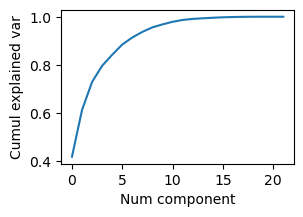

In [102]:
plt.figure(figsize=(3, 2))
plt.plot(range(0,22), pca.explained_variance_ratio_.cumsum())
plt.xlabel('Num component')
plt.ylabel('Cumul explained var')

In [103]:
pca = PCA(n_components=5)
pca.fit(std)
scores_pca = pca.transform(std)

In [104]:
wcss = []
for i in range(1,14):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

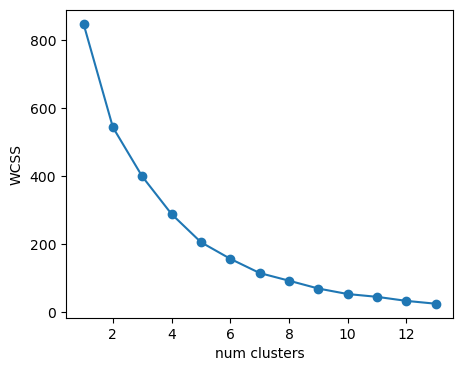

In [105]:
plt.figure(figsize = (5,4))
plt.plot(range(1, 14), wcss, marker='o')
plt.xlabel('num clusters')
plt.ylabel('WCSS')
plt.show()

In [106]:
kmeans_pca = KMeans(n_clusters=5, init='k-means++', random_state=42)

In [107]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=5, random_state=42)

In [109]:
featuresraw_pca = pd.concat([featuresraw, pd.DataFrame(scores_pca)], axis=1)
featuresraw_pca.columns.values[-5:] = ['Component1', 'Component2', 'Component3', 'Component4', 'Component5']
featuresraw_pca['pca_kmeans_labels'] = kmeans_pca.labels_

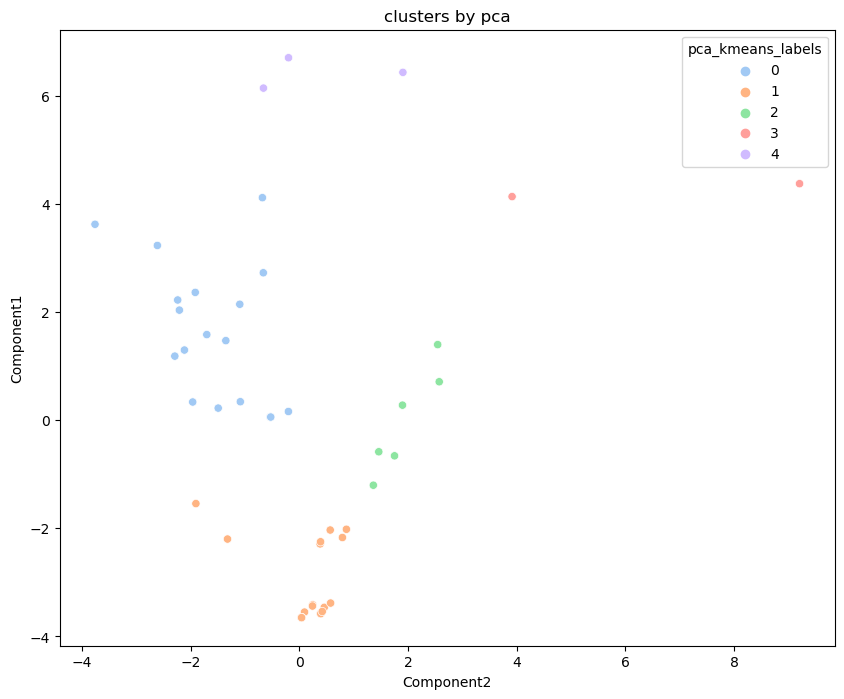

In [111]:
x_axis = featuresraw_pca['Component2']
y_axis = featuresraw_pca['Component1']
plt.figure(figsize=(10,8))
sns.scatterplot(data=featuresraw_pca, x='Component2', y='Component1', hue='pca_kmeans_labels', palette='pastel')

plt.title('clusters by pca')
plt.show()

In [166]:

start_time = time.time()
properties_0 = tcell_properties(0)
end_time = time.time()
nslices = 10
propertiesfinal = Parallel(n_jobs=nslices, verbose=True)(delayed(tcell_properties)(i) for i in range(10))
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time)

C:\Users\Gast-User\AppData\Local\Temp\ipykernel_17932\733482362.py:119: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propertiesall = propertiesall.append(properties)
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:  2.5min remaining: 10.0min


MemoryError: Unable to allocate 9.81 GiB for an array with shape (1316689920,) and data type int64

In [126]:
import gc

In [130]:
gc.get_threshold()
gc.get_count()
gc.collect()
gc.get_count()

(22, 0, 0)

In [125]:
propertiesfinal

[    cell_area  number_mito  mean_mito_aspect  std_mito_aspect  mean_mito_area  \
 0      567924          0.0          0.000000         0.000000        0.000000   
 1      523764         13.0          1.207432         0.287077     1620.307692   
 2       29448          0.0          0.000000         0.000000        0.000000   
 3      110076          3.0          1.052632         0.091161      945.333333   
 4       99388          3.0          1.066667         0.115470      574.000000   
 5      230004          5.0          1.264756         0.278017     1742.400000   
 6      175100          1.0          1.500000         0.000000     1292.000000   
 7      196700          0.0          0.000000         0.000000        0.000000   
 8       89384          0.0          0.000000         0.000000        0.000000   
 9      806788          8.0          1.345399         0.353808     2813.000000   
 10         40          0.0          0.000000         0.000000        0.000000   
 11        360  

In [118]:
propertiesdf = pd.DataFrame(propertiesfinal)

C:\Users\Gast-User\.conda\envs\MG\lib\site-packages\pandas\core\internals\construction.py:568: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [123]:
propertiesdf = pd.DataFrame(propertiesfinal[0])
propertiesdf = pd.concat([propertiesdf, propertiesfinal[1]], ignore_index = True)
propertiesdf

,cell_area,number_mito,mean_mito_aspect,std_mito_aspect,mean_mito_area,std_mito_area,mean_mito_roundness,std_mito_roundness,number_nuc,mean_nuc_aspect,...,std_nuc_area,mean_nuc_roundness,std_nuc_roundness,heterochromatin_area,lysosomal_area,gold_area,golgi_area,cytoplasm_area,ER_lengths,sl_num
0,567924,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,1.336678,...,162212.332421,0.774896,0.251083,126776,0,13744,0,286844.0,5790.005387,0
1,523764,13.0,1.207432,0.287077,1620.307692,978.392507,0.844462,0.142653,3.0,1.208810,...,66720.051799,0.713138,0.059062,143084,0,7468,0,232452.0,9256.108314,0
2,29448,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0,0,540,0,0.0,452.752307,0
3,110076,3.0,1.052632,0.091161,945.333333,392.333192,0.991240,0.099072,1.0,1.538462,...,0.000000,0.578910,0.000000,43092,0,1368,0,37328.0,0.000000,0
4,99388,3.0,1.066667,0.115470,574.000000,228.085510,0.984248,0.111467,1.0,1.344828,...,0.000000,0.692706,0.000000,9641,23871,712,0,86148.0,1835.581945,0
5,230004,5.0,1.264756,0.278017,1742.400000,525.392044,0.785327,0.089827,1.0,1.182927,...,0.000000,0.839500,0.000000,39664,0,3344,0,130744.0,4185.030649,0
6,175100,1.0,1.500000,0.000000,1292.000000,0.000000,0.713987,0.000000,1.0,1.122449,...,0.000000,0.705122,0.000000,54276,0,992,0,67884.0,2092.246817,0
7,196700,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.487500,...,0.000000,0.570287,0.000000,26156,0,5100,0,95216.0,0.000000,0
8,89384,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.109677,...,0.000000,0.754759,0.000000,20648,0,116,0,19236.0,0.000000,0
9,806788,8.0,1.345399,0.353808,2813.000000,1249.277277,0.714397,0.152641,1.0,1.093583,...,0.000000,0.697667,0.000000,171216,0,10136,0,440144.0,4550.216503,0


In [27]:
propertiesall = pd.DataFrame(columns=['variable1', 'variable2'])
for i in range(3):
    properties = pd.DataFrame()
    properties['variable1'] = 0
    properties['variable2'] = 0
    properties['variable1'] = i+2
    properties['variable2'] = i**2
    propertiesall = pd.concat([properties, propertiesall], ignore_index=True)
type(propertiesall)

pandas.core.frame.DataFrame

In [69]:
propertiesall_df = pd.DataFrame(propertiesall, columns=['cell_area', 'number_mito', 'mean_mito_aspect', 'std_mito_aspect',
                                                        'mean_mito_area', 'std_mito_area', 'mean_mito_roundness', 
                                                        'std_mito_roundness','number_nuc', ' mean_nuc_aspect', 'std_nuc_aspect',
                                                        'mean_nuc_area', 'std_nuc_area', 'mean_nuc_roundness','std_nuc_roundness',
                                                        'std_nuc_roundness','heterochromatin_area','lysosomal_area','gold_area',
                                                        'golgi_area', 'cytoplasm_area', 'ER_lengths', 'sl_num'])

C:\Users\Gast-User\.conda\envs\MG\lib\site-packages\pandas\core\internals\construction.py:568: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


ValueError: Shape of passed values is (2, 1), indices imply (2, 23)

In [28]:
propertiesall_df = pd.DataFrame(propertiesall, columns=['cell_area', 'number_mito', 'mean_mito_aspect'])
propertiesall_df

,cell_area,number_mito,mean_mito_aspect


In [11]:
propertiesall.to_excel("tcell_properties_v1.xlsx")

AttributeError: 'list' object has no attribute 'to_excel'

## Fix this:
Coordenates from the cell labels are affected by the labelling method.
Do it the other way around: cell id to mito data frame -> calculate shape parameters and then store as averages and std into general data frame.

In [51]:
coord_cell
#

,min_row,min_col,max_row,max_col,id_mito,mito_x_min,mito_x_max,mito_y_min,mito_y_max
0,3256,29148,4084,30344,4,3880,3906,29308,29336
1,3658,28706,4710,29570,12,4454,4500,29382,29424
2,4720,29274,5120,29488,0,0,0,0,0
3,6784,30750,7310,31042,15,7214,7248,30786,30820
4,9622,29474,10104,29804,18,9973,9993,29655,29675
5,10064,31790,10576,32396,24,10394,10452,31866,31920
6,10106,30774,10588,31540,22,10320,10368,31208,31240
7,10120,5242,10714,5772,0,0,0,0,0
8,13274,10416,13668,10776,0,0,0,0,0
9,13856,28698,14856,30216,32,14680,14748,29464,29526


In [60]:
def mask_nuc(labels:'uint8 ndarray', organelle_mask:'ndarray'):
    organelle_labels = np.zeros((labels.shape), dtype=np.uint8)
    for i in range(labels.shape[0]):
            for j in range(labels.shape[1]):
                if organelle_mask[i][j] != 0:
                    organelle_labels[i][j] = labels[i][j]
                else:
                    organelle_labels[i][j] = np.nan

In [33]:
folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\cell'
heterochromatin_folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\heterochromatin'
gold_folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\gold'
lysosomes_folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\lysosome'
mitochondria_folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\mitochondria'
nucleus_folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\nucleus'
ER_folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\er'
golgi_folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\golgi'


def make_properties(i):
    properties = {}
    
    # label cells
    cell = Cells(i)
    imageshape = cell.get_imageshape(folder) #TODO: this step is redundant! Fix in cells
    cell_image = cell.img_from_tiles(folder)
    cell_labels = cell.label_cells(cell_image)
    #cell_bboxes = cell.get_bbox(cell_labels)
    
    
    # label organelles
    heterochromatin_labels = mask_it(cell_labels, cell.img_from_tiles(heterochromatin_folder))
    lysosomes_labels = mask_it(cell_labels, cell.img_from_tiles(lysosomes_folder))
    mitochondria_labels = mask_it(cell_labels, cell.img_from_tiles(mitochondria_folder))
    nucleus_labels = mask_it(cell_labels, cell.img_from_tiles(nucleus_folder))
    gold_labels = mask_it(cell_labels, cell.img_from_tiles(gold_folder))
    golgi_labels = mask_it(cell_labels, cell.img_from_tiles(golgi_folder))
    ER = cell.img_from_tiles(ER_folder)
    
 
    # calc properties
    labels_list = np.unique(cell_labels)[1:]

    properties['id'] = np.array(labels_list)
    properties['cell_area'] = get_area(cell_labels, labels_list)
    properties['nucleus_area'] = get_area(nucleus_labels, labels_list)
    properties['heterochromatin_area'] = get_area(heterochromatin_labels, labels_list)
    properties['mitochondria_area'] = get_area(mitochondria_labels, labels_list)
    properties['lysosomal_area'] = get_area(lysosomes_labels, labels_list)
    properties['gold_area'] = get_area(gold_labels, labels_list)
    properties['golgi_area'] = get_area(golgi_labels, labels_list)
    properties['cytoplasm_area'] = properties['cell_area'] - properties['nucleus_area']
    
    properties['ER_lengths'] = ER_length(ER, cell_labels)
    properties['sl_num'] = np.array([i]*len(labels_list))
    
    bbox_rects = []
    for region in regionprops(cell_labels):
        bbox_rect = []
        bbox = region.bbox
        bbox_rect = draw_bbox(bbox)
        bbox_rects.append(bbox_rect)
    properties['bbox_rects'] = bbox_rects
    
    bbox_nucleus = []
    for j in regionprops(nucleus_labels):               
        bbox_nuc = []
        bbox_n = j.bbox
        bbox_nuc = draw_bbox(bbox_n)
        bbox_nucleus.append(np.array(bbox_nuc))
    properties['bbox_nucleus'] = bbox_nucleus
    
    bbox_mitochondria = []

    for i in properties_0['mitochondria_area']:
        if i == 0:
            size = (4,2)
            bbox_mitochondria.append(np.zeros(size , dtype=int))
        else:
            for region_m in regionprops(mitochondria_labels):
                bbox_mit = []
                bbox_m = region_m.bbox
                bbox_mit = draw_bbox(bbox_m)
                bbox_mitochondria.append(np.array(bbox_mit))

            
    properties['bbox_mitochondria'] = bbox_mitochondria
    
    region = regionprops(cell_labels)
    large = []
    small = []
    for r in region:
        min_row, min_col, max_row, max_col = r.bbox
        D = max(max_row - min_row, max_col - min_col)
        large.append(D)
        d = min(max_row - min_row, max_col - min_col)
        small.append(d)
    properties['cell_large_side'] = np.array(large)
    properties['cell_small_side'] = np.array(small)
    
    properties['roundness'] = (4*properties['cell_area'])/(np.pi*(properties['cell_large_side'])**2)
    
    return properties

In [73]:
mito_coord = []

for r in regionprops(mitochondria_labels):
     min_row, min_col, max_row, max_col = r.bbox
     mito_coord.append((min_row, min_col, max_row, max_col))
  

In [74]:
coord_mito = pd.DataFrame(mito_coord, columns = ["min_row", "min_col", "max_row", "max_col"])
print(coord_mito)


   min_row  min_col  max_row  max_col
0     8382    20794     8416    20828
1    11008    19557    11172    19783
2    11274    21838    11620    22216
3    11488    21216    11536    21248
4    15178    18916    15916    20044
5    16080     2400    16316     2808
6    19135    12461    19319    12686


In [124]:
cell_coord = []

for r in regionprops(bbox_mitochondria):
     min_row, min_col, max_row, max_col = r.bbox
     cell_coord.append((min_row, min_col, max_row, max_col))

AttributeError: 'list' object has no attribute 'ndim'

In [80]:
coord_cell = pd.DataFrame(cell_coord, columns = ["min_row", "min_col", "max_row", "max_col"])
print(coord_cell)

    min_row  min_col  max_row  max_col
0      8192    20758     8478    21050
1     10790    19482    11272    19812
2     11232    21798    11744    22404
3     11274    20782    11756    21548
4     11288     5842    11882     6372
5     14442    11016    14836    11376
6     15024    18706    16024    20224
7     15362    20578    15372    20584
8     15448    18872    15456    18944
9     15593     7918    15828     8133
10    15750     2114    16326     2850
11    18794     8220    18962     8406
12    18996     8340    19054     8396
13    19000    12402    19658    12762


In [120]:
my_dict = {}
for y in range(len(coord_mito)):
    
    for x in range(len(coord_cell)):
        
        key = f"{x}"
        
        if (coord_mito["min_row"][y] >= coord_cell["min_row"][x]  and coord_mito["max_row"][y] <= coord_cell["max_row"][x]) and (coord_mito["min_col"][y] >= coord_cell["min_col"][x]and coord_mito["max_col"][y] <= coord_cell["max_col"][x]):
            my_dict[key] = coord_mito["min_row"][y], coord_mito["max_row"][y],coord_mito["max_col"][y],coord_mito["max_col"][y]


In [121]:
my_dict

{'0': (8382, 8416, 20828, 20828),
 '1': (11008, 11172, 19783, 19783),
 '2': (11274, 11620, 22216, 22216),
 '3': (11488, 11536, 21248, 21248),
 '6': (15178, 15916, 20044, 20044),
 '10': (16080, 16316, 2808, 2808),
 '13': (19135, 19319, 12686, 12686)}

In [91]:
coord_mito["min_row"][1]

11008

In [32]:

bbox_mitochondria = []
size = (4,2)

for i in properties_0['mitochondria_area']:
    if i == 0:
        bbox_mitochondria.append(np.zeros(size , dtype=int))
    else:
        for region_m in regionprops(mitochondria_labels):
            bbox_mit = []
            bbox_m = region_m.bbox
            bbox_mit = draw_bbox(bbox_m)
            bbox_mitochondria.append(np.array(bbox_mit))
            
    

In [38]:
df_mito = pd.DataFrame(bbox_mitochondria, columns = ["point1", "point2", "point3", "point4"])

ValueError: Must pass 2-d input. shape=(56, 4, 2)

In [127]:

for i in range(len(bbox_mitochondria)):
    min_x, min_y, max_x, max_y = bbox_mitochondria[i][0][0], bbox_mitochondria[i][0][1],bbox_mitochondria[i][1][0], bbox_mitochondria[i][2][1]
    print(min_x, min_y, max_x, max_y)


8382 20794 8416 20828
11008 19557 11172 19783
11274 21838 11620 22216
11488 21216 11536 21248
15178 18916 15916 20044
16080 2400 16316 2808
19135 12461 19319 12686
8382 20794 8416 20828
11008 19557 11172 19783
11274 21838 11620 22216
11488 21216 11536 21248
15178 18916 15916 20044
16080 2400 16316 2808
19135 12461 19319 12686
8382 20794 8416 20828
11008 19557 11172 19783
11274 21838 11620 22216
11488 21216 11536 21248
15178 18916 15916 20044
16080 2400 16316 2808
19135 12461 19319 12686
8382 20794 8416 20828
11008 19557 11172 19783
11274 21838 11620 22216
11488 21216 11536 21248
15178 18916 15916 20044
16080 2400 16316 2808
19135 12461 19319 12686
0 0 0 0
0 0 0 0
8382 20794 8416 20828
11008 19557 11172 19783
11274 21838 11620 22216
11488 21216 11536 21248
15178 18916 15916 20044
16080 2400 16316 2808
19135 12461 19319 12686
0 0 0 0
0 0 0 0
0 0 0 0
8382 20794 8416 20828
11008 19557 11172 19783
11274 21838 11620 22216
11488 21216 11536 21248
15178 18916 15916 20044
16080 2400 16316 2808


In [57]:
bbox_mitochondria[7][1][1]

20794

In [130]:
bbox_mitochondria


[array([[ 8382, 20794],
        [ 8416, 20794],
        [ 8416, 20828],
        [ 8382, 20828]]),
 array([[11008, 19557],
        [11172, 19557],
        [11172, 19783],
        [11008, 19783]]),
 array([[11274, 21838],
        [11620, 21838],
        [11620, 22216],
        [11274, 22216]]),
 array([[11488, 21216],
        [11536, 21216],
        [11536, 21248],
        [11488, 21248]]),
 array([[15178, 18916],
        [15916, 18916],
        [15916, 20044],
        [15178, 20044]]),
 array([[16080,  2400],
        [16316,  2400],
        [16316,  2808],
        [16080,  2808]]),
 array([[19135, 12461],
        [19319, 12461],
        [19319, 12686],
        [19135, 12686]]),
 array([[ 8382, 20794],
        [ 8416, 20794],
        [ 8416, 20828],
        [ 8382, 20828]]),
 array([[11008, 19557],
        [11172, 19557],
        [11172, 19783],
        [11008, 19783]]),
 array([[11274, 21838],
        [11620, 21838],
        [11620, 22216],
        [11274, 22216]]),
 array([[11488, 2121

In [29]:
folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\cell'
mitochondria_folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\mitochondria'
cell = Cells(0)
properties = {}
imageshape = cell.get_imageshape(folder) #TODO: this step is redundant! Fix in cells
cell_image = cell.img_from_tiles(folder)
cell_labels = cell.label_cells(cell_image)
mitochondria_labels = mask_it(cell_labels, cell.img_from_tiles(mitochondria_folder))


In [122]:
print(mitochondria_labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Use next cell to calculate the function make_properties for one section before applying it to the whole volume (FOR THE WHOLE VOLUME OR A LARGE NUMBER OF SECTIONS USE PARALLEL COMPUTING). 

In [34]:
properties_0 = make_properties(0)

In [35]:
properties_0



{'id': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       dtype=uint8),
 'cell_area': array([ 69760,  99388, 230004, 175100, 196700,  89384, 806788,     40,
           360,  39125, 268560,  20644,   2400, 178260]),
 'nucleus_area': array([ 51040,  13240,  99260, 107216, 101484,  70148, 366644,      0,
             0,  12360, 151928,      0,      0,  58395]),
 'heterochromatin_area': array([ 28008,   9641,  39664,  54276,  26156,  20648, 171216,      0,
             0,   8412,  81772,      0,      0,  27746]),
 'mitochondria_area': array([  896,  1722,  8712,  1292,     0,     0, 22504,     0,     0,
            0,  4276,     0,     0,  5386]),
 'lysosomal_area': array([    0, 23871,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0]),
 'gold_area': array([ 1244,   712,  3344,   992,  5100,   116, 10136,     0,     0,
          675,  5212,  2668,   204,  1920]),
 'golgi_area': array([   0,    0,    0, 1424,    0,    0,    0,  

In [ ]:
folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\cell'
cell = Cells(100)
imageshape = cell.get_imageshape(folder) #TODO: this step is redundant! Fix in cells
cell_image = cell.img_from_tiles(folder)
cell_labels = cell.label_cells(cell_image)
labels_list = np.unique(cell_labels)[1:]
labels_list, type(labels_list), np.array(labels_list)
nucleus_labels = mask_it(cell_labels, cell.img_from_tiles(nucleus_folder))


In [41]:
nslices = 2
properties = Parallel(n_jobs=nslices, verbose=True)(delayed(make_properties)(i) for i in range(2))

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:  1.7min remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:  1.7min finished


{}

In [36]:
features = pd.DataFrame()
featuresall = pd.DataFrame()

for i in range(2):
    
    features = pd.DataFrame()
    features = pd.DataFrame.from_dict(properties[i])
    featuresall = pd.concat([featuresall, features], ignore_index=True)
featuresall

KeyError: 0

In [ ]:
features = pd.DataFrame()
featuresall = pd.DataFrame()
for i in range(2):
    features = pd.DataFrame()
    features = pd.DataFrame.from_dict(properties[i])
    featuresall = features.set_index('id').combine_first(df2.set_index('id')).reset_index()
featuresall

In [4]:
# label cells
cell = Cells(1)
imageshape = cell.get_imageshape(folder) #TODO: this step is redundant! Fix in cells
imageshape

(0, 0, 6594, 6594)

In [9]:
cell = Cells()
imageshape = cell.get_imageshape(folder) #TODO: this step is redundant! Fix in cells
imageshape


(0, 0, 6594, 6594)